In [1]:
import sys
sys.path.append('../../numpy/1D')

from utils import *
from env import *
from model import *
from matplotlib import gridspec

In [2]:
# set directory to folder with model trained with different place field parameter combinations
data_dir = "/Users/mganeshkumar/Library/CloudStorage/OneDrive-HarvardUniversity/Code/online_pf_learning/online/1D/"

In [3]:
[cr_256] = saveload(data_dir+f'./comp_data/drift_G_lr0.0001_50s_clipFalse_256', 1, 'load')
print(cr_256.shape)
[cum_rewards] = saveload(data_dir+f'./comp_data/drift_G_lr0.0001_50s_clipFalse', 1, 'load')
print(cum_rewards.shape)
cum_rewards = cum_rewards[0,:,:,0]

cum_rewards = np.concatenate([cum_rewards, cr_256],axis=0)

(1, 3, 5, 50, 2500)
(1, 5, 3, 1, 5, 50, 2500)


In [4]:
def zero_to_nan(tensor):
    # Convert zeros to NaN
    zero_mask = np.all(tensor == 0, axis=4)

    # Step to convert those zero vectors to NaN
    # Using broadcasting to set zeros to NaN where the zero_mask is True
    tensor[zero_mask, :] = np.nan
    
    return tensor

In [5]:
seeds = 50
episodes = 50000
goalcoords = [0.5, 0.0, 0.75, -0.25, 0.5]
total_episodes = 50000 * len(goalcoords)
trials = np.arange(total_episodes)[::100]
lrs = [0.0001]
noises = [0.0, 1e-4, 2.5e-4, 5e-4, 1e-3]
npcs = [8, 16, 32, 64, 128, 256]
sigmas = [0.025, 0.05, 0.1]
piname = '012'
window = 1
downsample = 1


cr  = zero_to_nan(cum_rewards)
print(cum_rewards.shape)
print("Contains 0.0:", (cr == 0.0).any()) 
print("Contains NaN", np.isnan(cr).any()) 

(6, 3, 5, 50, 2500)
Contains 0.0: False
Contains NaN True


$N=8, \xi=0.0$  --> 23.025$
$N=8, \xi=0.0001$  --> 27.179$
$N=8, \xi=0.00025$  --> 29.566$
$N=8, \xi=0.0005$  --> 27.885$
$N=8, \xi=0.001$  --> 22.383$
$N=8, \xi=0.0$  --> 25.898$
$N=8, \xi=0.0001$  --> 26.408$
$N=8, \xi=0.00025$  --> 25.424$
$N=8, \xi=0.0005$  --> 25.654$
$N=8, \xi=0.001$  --> 23.444$
$N=8, \xi=0.0$  --> 24.510$
$N=8, \xi=0.0001$  --> 28.249$
$N=8, \xi=0.00025$  --> 26.161$
$N=8, \xi=0.0005$  --> 25.405$
$N=8, \xi=0.001$  --> 23.570$
$N=16, \xi=0.0$  --> 21.613$
$N=16, \xi=0.0001$  --> 25.398$
$N=16, \xi=0.00025$  --> 27.628$
$N=16, \xi=0.0005$  --> 27.000$
$N=16, \xi=0.001$  --> 24.780$
$N=16, \xi=0.0$  --> 24.603$
$N=16, \xi=0.0001$  --> 25.846$
$N=16, \xi=0.00025$  --> 25.904$
$N=16, \xi=0.0005$  --> 26.097$
$N=16, \xi=0.001$  --> 24.322$
$N=16, \xi=0.0$  --> 23.392$
$N=16, \xi=0.0001$  --> 23.899$
$N=16, \xi=0.00025$  --> 25.495$
$N=16, \xi=0.0005$  --> 25.226$
$N=16, \xi=0.001$  --> 24.145$


/var/folders/9w/2t7dk80j0vncsnz93dbrg1080000gp/T/ipykernel_97177/2166618332.py:17: RuntimeWarning: Mean of empty slice
  allg[n,s,ns] = np.nanmean(comb,axis=1)


$N=32, \xi=0.0$  --> 18.875$
$N=32, \xi=0.0001$  --> 23.688$
$N=32, \xi=0.00025$  --> 24.363$
$N=32, \xi=0.0005$  --> 25.050$
$N=32, \xi=0.001$  --> 26.755$
$N=32, \xi=0.0$  --> 19.288$
$N=32, \xi=0.0001$  --> 22.709$
$N=32, \xi=0.00025$  --> 23.849$
$N=32, \xi=0.0005$  --> 25.138$
$N=32, \xi=0.001$  --> 24.361$
$N=32, \xi=0.0$  --> 20.902$
$N=32, \xi=0.0001$  --> 22.370$
$N=32, \xi=0.00025$  --> 25.747$
$N=32, \xi=0.0005$  --> 25.674$
$N=32, \xi=0.001$  --> 25.381$
$N=64, \xi=0.0$  --> 20.692$
$N=64, \xi=0.0001$  --> 20.137$
$N=64, \xi=0.00025$  --> 24.650$
$N=64, \xi=0.0005$  --> 29.408$
$N=64, \xi=0.001$  --> 26.094$
$N=64, \xi=0.0$  --> 20.148$
$N=64, \xi=0.0001$  --> 21.007$
$N=64, \xi=0.00025$  --> 24.049$
$N=64, \xi=0.0005$  --> 28.081$
$N=64, \xi=0.001$  --> 25.750$
$N=64, \xi=0.0$  --> 19.264$
$N=64, \xi=0.0001$  --> 22.316$
$N=64, \xi=0.00025$  --> 25.222$
$N=64, \xi=0.0005$  --> 29.379$
$N=64, \xi=0.001$  --> 27.346$
$N=128, \xi=0.0$  --> 19.516$
$N=128, \xi=0.0001$  --> 21.

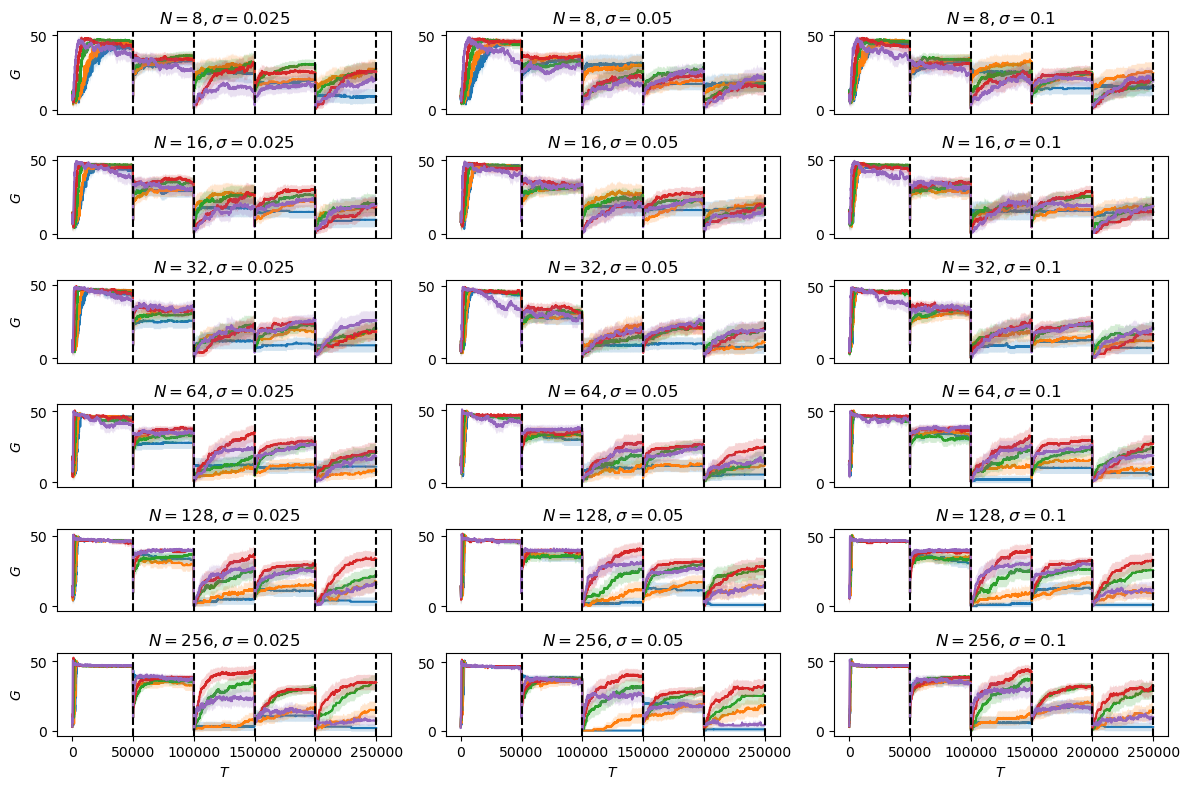

In [6]:
allg = np.zeros([len(npcs),len(sigmas), len(noises), seeds])

f, axs = plt.subplots(6,3,figsize=(12, 8))

for n,npc in enumerate(npcs):
    for s,sigma in enumerate(sigmas):
        
        ax = axs[n,s]


        for ns, noise in enumerate(noises):

            comb = cum_rewards[n,s,ns]
            meang = np.nanmean(comb, axis=0)
            ci = 1.96* np.nanstd(comb,axis=0)/np.sqrt(comb.shape[0])

            allg[n,s,ns] = np.nanmean(comb,axis=1)

            ax.plot(trials, meang, label=f"$\sigma_{{noise}}={noise}$", zorder=2)
            ax.fill_between(trials, meang- ci, meang + ci, alpha=0.2, zorder=2)
            print(f"$N={npc}, \\xi={noise}$  --> {np.nanmean(meang):.3f}$")

        ax.set_title(f'$N={npc}, \sigma={sigma}$')

        if n == 5:
            ax.set_xlabel(f'$T$')
        else:
            ax.set_xticks([])
        if s == 0:
            ax.set_ylabel('$G$')

        # Adjust annotation for each goalcoord
        for i, coord in enumerate(goalcoords):
            ax.axvline(episodes * (i + 1), color='k', linestyle='--', zorder=3)
            # x_pos = (i * episodes + episodes // 2)
            # y_pos = ax.get_ylim()[1] * 1.2  # Placing text just below the maximum y-axis limit
            # ax.text(x_pos, y_pos, f'$x_r={coord}$', ha='center', va='top', fontsize=8, bbox=dict(facecolor='white', alpha=0.6))

        # Place the legend on the right side
        # ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, fontsize=8, frameon=True)

        f.tight_layout()

        # f.savefig(f'./svgs/drift_G_ind.svg', dpi=300)

(5, 50, 2500) (5, 50)
$N=256, \xi=0.0$  --> 18.792$
$N=256, \xi=0.0001$  --> 21.306$
$N=256, \xi=0.00025$  --> 27.727$
$N=256, \xi=0.0005$  --> 33.089$
$N=256, \xi=0.001$  --> 29.596$


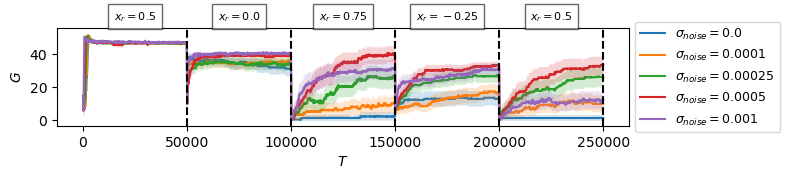

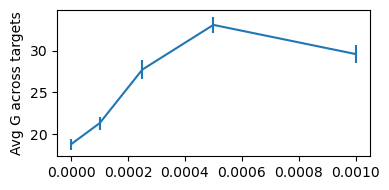

In [7]:
# average over npc and sigma

cr = np.nanmean(np.nanmean(cum_rewards,axis=0),axis=0)
ag = np.nanmean(np.nanmean(allg,axis=0),axis=0)
npc_idx = 4
sigma_idx = 2
cr = cum_rewards[npc_idx,sigma_idx]
ag = allg[npc_idx, sigma_idx]

print(cr.shape, ag.shape)
f, ax = plt.subplots(1,1,figsize=(8, 2))
f1, ax1 = plt.subplots(1,1,figsize=(4, 2))

for ns, noise in enumerate(noises):

    comb = cr[ns]
    meang = np.nanmean(comb, axis=0)
    ci = 1.96* np.nanstd(comb,axis=0)/np.sqrt(comb.shape[0])

    ax.plot(trials, meang, label=f"$\sigma_{{noise}}={noise}$", zorder=2)
    ax.fill_between(trials, meang- ci, meang + ci, alpha=0.2, zorder=2)
    print(f"$N={npc}, \\xi={noise}$  --> {np.nanmean(meang):.3f}$")

ax.set_ylabel('$G$')
ax.set_xlabel(f'$T$')

# Adjust annotation for each goalcoord
for i, coord in enumerate(goalcoords):
    ax.axvline(episodes * (i + 1), color='k', linestyle='--', zorder=3)
    x_pos = (i * episodes + episodes // 2)
    y_pos = ax.get_ylim()[1] * 1.2  # Placing text just below the maximum y-axis limit
    ax.text(x_pos, y_pos, f'$x_r={coord}$', ha='center', va='top', fontsize=8, bbox=dict(facecolor='white', alpha=0.6))

# Place the legend on the right side
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, fontsize=9, frameon=True)

f.tight_layout()
# f.savefig(f'./svgs/drift_G_256_0.1.svg')

ax1.errorbar(x=noises, y=np.nanmean(ag,axis=1),yerr=np.nanstd(ag,axis=1)/np.sqrt(seeds))
# ax1.set_xscale('log')
ax1.set_ylabel('Avg G across targets')
f1.tight_layout()
